In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def disp(img,cmap='gray'):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [5]:
brd=cv2.imread('/root/Desktop/python/oneparrot.jpeg',0)
brd=cv2.resize(brd,(300,168))

In [6]:
if brd.filename == "oneparrot.jpeg":
    disp(brd)

AttributeError: 'numpy.ndarray' object has no attribute 'filename'

In [26]:
brdgrp=cv2.imread('/root/Desktop/python/manyparrots.jpeg',0)

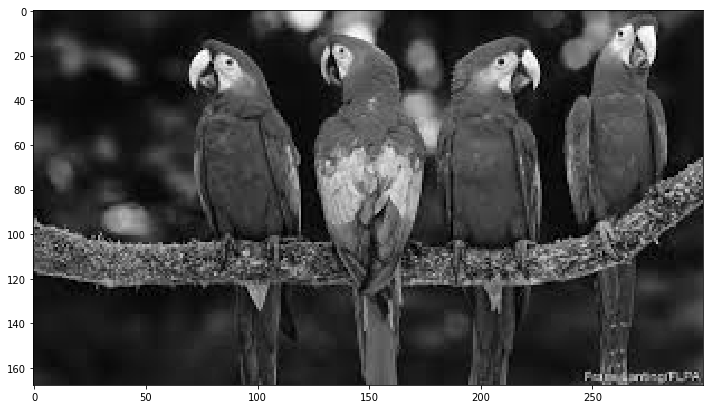

In [27]:
disp(brdgrp)

In [28]:
orb=cv2.ORB_create()

In [29]:
kp1,des1=orb.detectAndCompute(brd,None)
kp2,des2=orb.detectAndCompute(brdgrp,None)

In [30]:
bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [31]:
matches=bf.match(des1,des2)

In [32]:
len(matches)

116

In [33]:
matches=sorted(matches,key=lambda x:x.distance)

In [34]:
bird_matches=cv2.drawMatches(brd,kp1,brdgrp,kp2,matches[:50],None,flags=2)

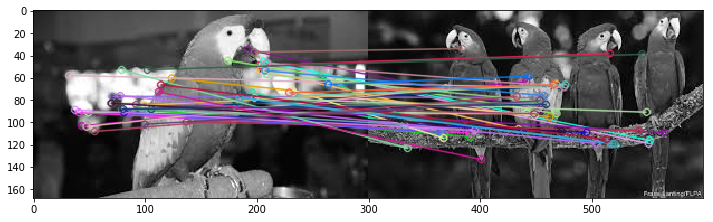

In [14]:
disp(bird_matches)

In [20]:
sift=cv2.xfeatures2d_SIFT()
#sift = cv2.SIFT()

In [21]:
kp1,des1=sift.detectAndCompute(brd,None)
kp2,des2=sift.detectAndCompute(brdgrp,None)

TypeError: Incorrect type of self (must be 'Feature2D' or its derivative)

In [17]:
cv2.BFMatcher()   #(crossCheck=False)
#matches=bf.knnMatch(np.asarray(des1,np.float32),np.asarray(des2,np.float32),K=2)
matches=bf.knnMatch(des1,des2,K=2)
                   

TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
good=[]
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [ ]:
sift_matches=cv2.drawMatches(brd,kp1,brdgrp,kp2,good,None,flags=2)

In [ ]:
disp(sift_matches)